# Decision Tree Model on Diabetes Dataset
## Anisha Rajesh (6851162)
##### Code referenced from Lab 1 and Lab 2 of MLDM 

#### 1) Decision Tree Initial Hold-out Results (75/25 split):

### Import Statements

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and Seperating Features

In [2]:
data = pd.read_csv('./balanced_diabetes.csv')

X = data.drop('Outcome', axis=1)
y = data['Outcome']
print(X)
print(y)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.670968       0.489796       0.304348  0.133413  0.314928   
1       0.058824  0.264516       0.428571       0.239130  0.133413  0.171779   
2       0.470588  0.896774       0.408163       0.239130  0.133413  0.104294   
3       0.058824  0.290323       0.428571       0.173913  0.096154  0.202454   
4       0.000000  0.600000       0.163265       0.304348  0.185096  0.509202   
..           ...       ...            ...            ...       ...       ...   
947     0.411765  0.745822       0.354803       0.258775  0.169618  0.250721   
948     0.209041  0.377981       0.453704       0.243981  0.133413  0.278558   
949     0.201497  0.866710       0.610946       0.217391  0.183713  0.353601   
950     0.117647  0.301981       0.455568       0.382189  0.137682  0.404047   
951     0.444858  0.701211       0.537630       0.278871  0.133413  0.295756   

     DiabetesPedigreeFunction       Age

### Splitting Dataset into 75%, 25 % training and testing 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=47) # 75% train and 25% test dataset

### Initialise and training Dataset 

In [4]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [5]:
# Make predictions
y_pred = dt_model.predict(X_test)

#### Evaluating the Decision Tree on Train data

Accuracy Score on Train data:   1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       358
           1       1.00      1.00      1.00       356

    accuracy                           1.00       714
   macro avg       1.00      1.00      1.00       714
weighted avg       1.00      1.00      1.00       714



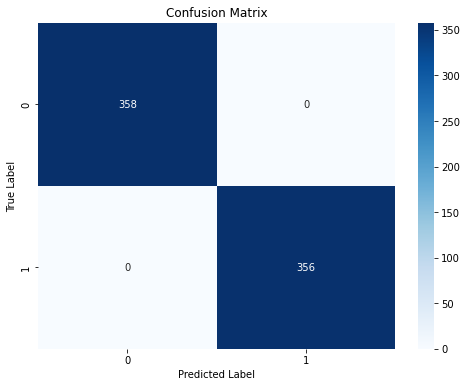

In [6]:
from sklearn.metrics import accuracy_score
print('Accuracy Score on Train data:  ', accuracy_score(y_true=y_train, y_pred=dt_model.predict(X_train)))

print("\nClassification Report:")
print(classification_report(y_train,y_pred=dt_model.predict(X_train)))

# Create confusion matrix visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_train, y_pred=dt_model.predict(X_train))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


#### Evaluating the Decision Tree on Test data

Accuracy Score on test data:   0.7773109243697479

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       118
           1       0.76      0.82      0.79       120

    accuracy                           0.78       238
   macro avg       0.78      0.78      0.78       238
weighted avg       0.78      0.78      0.78       238



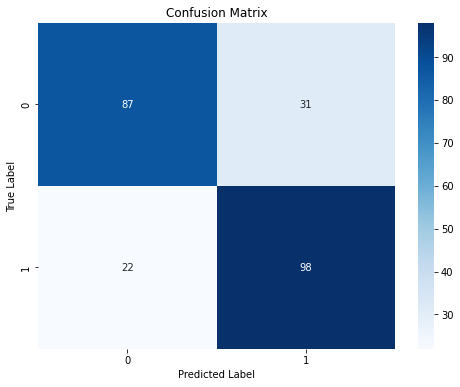

In [7]:
print('Accuracy Score on test data:  ', accuracy_score(y_true=y_test, y_pred=y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


### Visualising a decision Tree

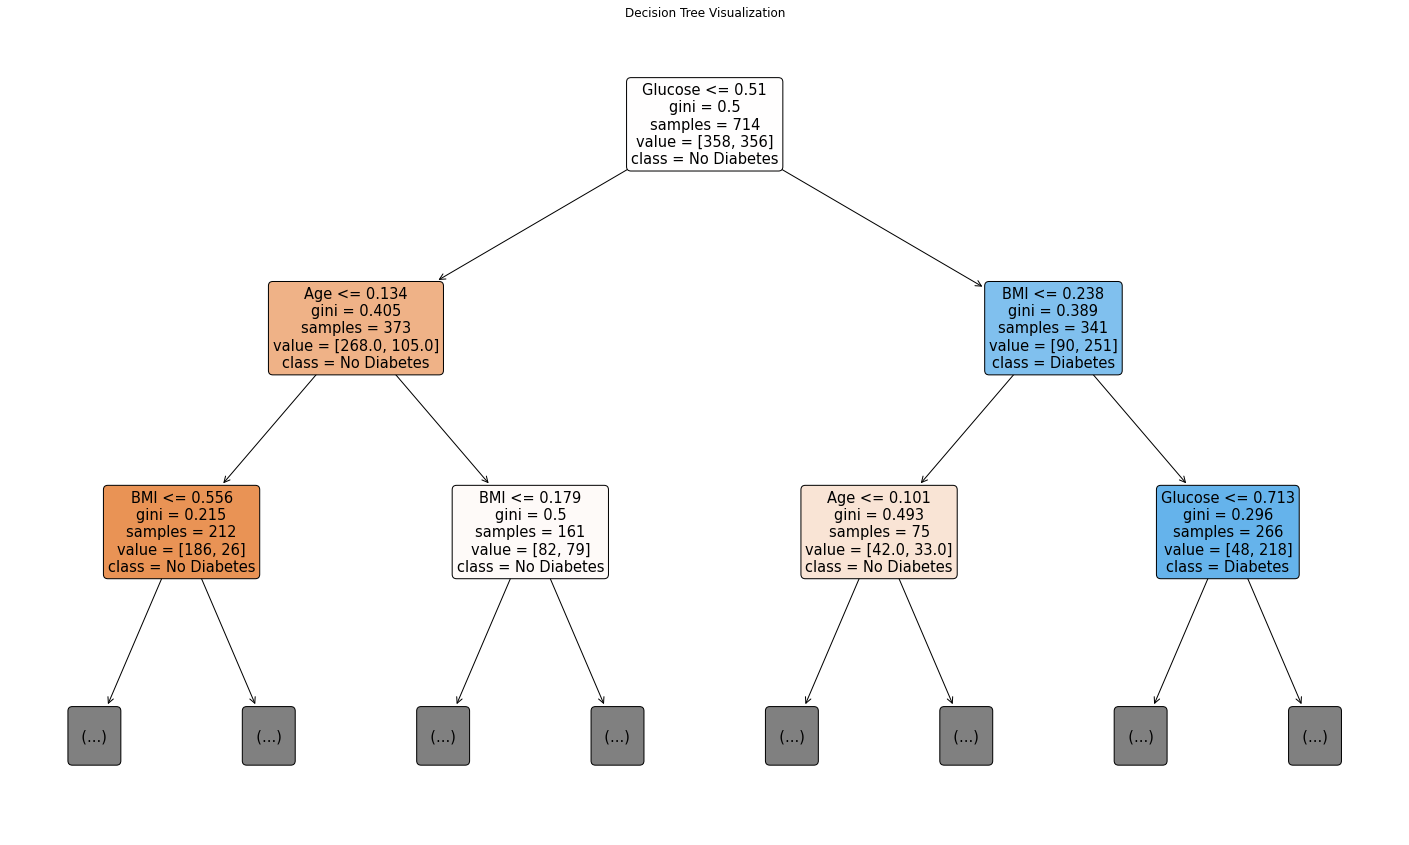

In [8]:
plt.figure(figsize=(25,15))

# Plot the decision tree
plot_tree(dt_model, 
          feature_names=X.columns, 
          class_names=['No Diabetes', 'Diabetes'], 
          filled=True,  
          rounded=True,
          max_depth=2) 
plt.title('Decision Tree Visualization')
plt.show()

In [9]:
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=dt_model.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=dt_model.predict(X_test)))

Accuracy Score on train data:  1.0
Accuracy Score on the test data:  0.7773109243697479


### Pruning decision trees with cost complexity pruning 

#### When: ccp_alpha=0.005

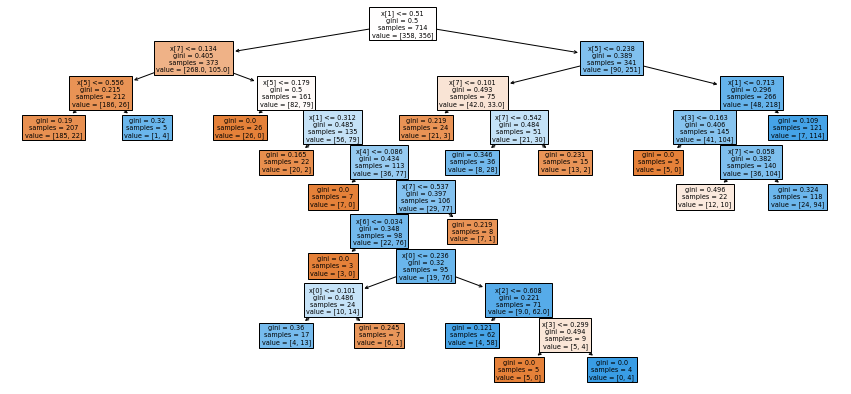

In [10]:
plt.figure(figsize=(15,7))
dt_model2 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.005).fit(X_train, y_train)
plot_tree(dt_model2, filled=True)
plt.show()

In [11]:
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=dt_model2.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=dt_model2.predict(X_test)))

Accuracy Score on train data:  0.8753501400560224
Accuracy Score on the test data:  0.8025210084033614


#### When: ccp_alpha=0.01

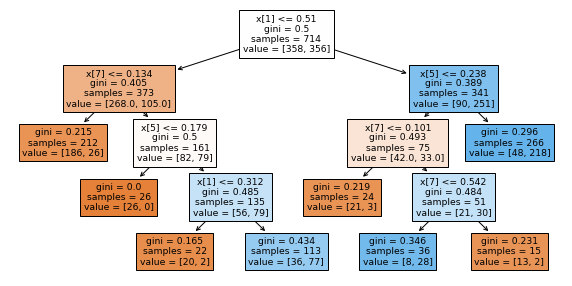

Accuracy Score on train data:  0.8249299719887955
Accuracy Score on the test data:  0.7941176470588235


In [12]:
plt.figure(figsize=(10,5))
dt_model3 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01).fit(X_train, y_train)
plot_tree(dt_model3, filled=True)
plt.show()
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=dt_model3.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=dt_model3.predict(X_test)))

#### Thus after Pruning the test accuracy has slighly improved from 71% to 74.5% for ccp=0.005

### Finding Best alpha values 

In [13]:
# Get the cost complexity pruning path
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [14]:
# Take fewer samples of alpha values (every nth value)
n = 20 
alpha_samples = np.linspace(0, len(ccp_alphas)-1, n, dtype=int)
selected_alphas = ccp_alphas[alpha_samples]

# Initialize arrays to store scores
train_scores = np.zeros(len(selected_alphas))
test_scores = np.zeros(len(selected_alphas))

# Calculate scores for each alpha value
for i, alpha in enumerate(selected_alphas):
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    train_scores[i] = clf.score(X_train, y_train)
    test_scores[i] = clf.score(X_test, y_test)

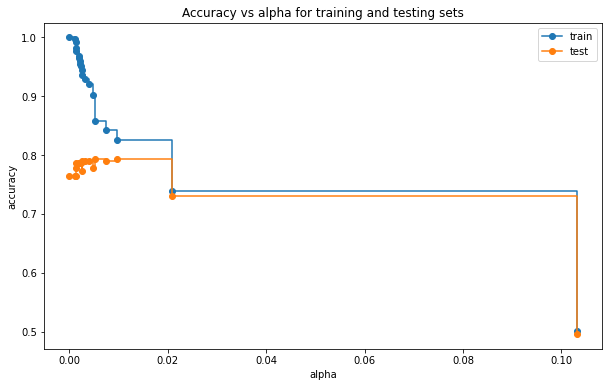

In [15]:

plt.figure(figsize=(10, 6))
plt.plot(selected_alphas, train_scores, marker='o', label="train",
         drawstyle="steps-post")
plt.plot(selected_alphas, test_scores, marker='o', label="test",
         drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.title("Accuracy vs alpha for training and testing sets")
plt.legend()
plt.show()

In [16]:
# Print the optimal alpha value
optimal_idx = np.argmax(test_scores)
print(f"Optimal alpha value: {selected_alphas[optimal_idx]:.6f}")
print(f"Best test accuracy: {test_scores[optimal_idx]:.4f}")

Optimal alpha value: 0.005268
Best test accuracy: 0.7941


#### Drawback of the above approach
<p> In the last experiment above, the test dataset has been used as a 'validation' set to tune a parameter of the learning algorithm, i.e. an optimal value for ccp_alpha. However, a testing dataset should be regarded as a hold-out 'unseen' data by the learner and should not be used to tune the learning parameters. In general a subset of the main training dataset should be used as 'validation' set for tuning learning parameters. Repeat the experiment above by splitting the main traning dataset into a new training dataset and a validation set (e.g. 25% of the main training dataset), choose an optimal value for ccp_alpha using the new training data and the validation set and measure the accuracy of the learned tree on the (hold-out) testing data before and after pruning. </p>

## 2)  Three-way Split Results (with validation set):

Used validation set instead of test set for finding optimal alpha
Used the test set only for final evaluation
Added more comprehensive performance metrics
Included final model training with optimal alpha
Added detailed classification report for the test set
</p>
This approach is more robust because:
<p>
It uses a separate validation set for tuning the alpha parameter
The test set remains completely untouched until final evaluation
It provides a more realistic estimate of model performance
It helps prevent overfitting to the test set during parameter tuning
</p>

Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Cross-Validation Score: 0.7906542056074766


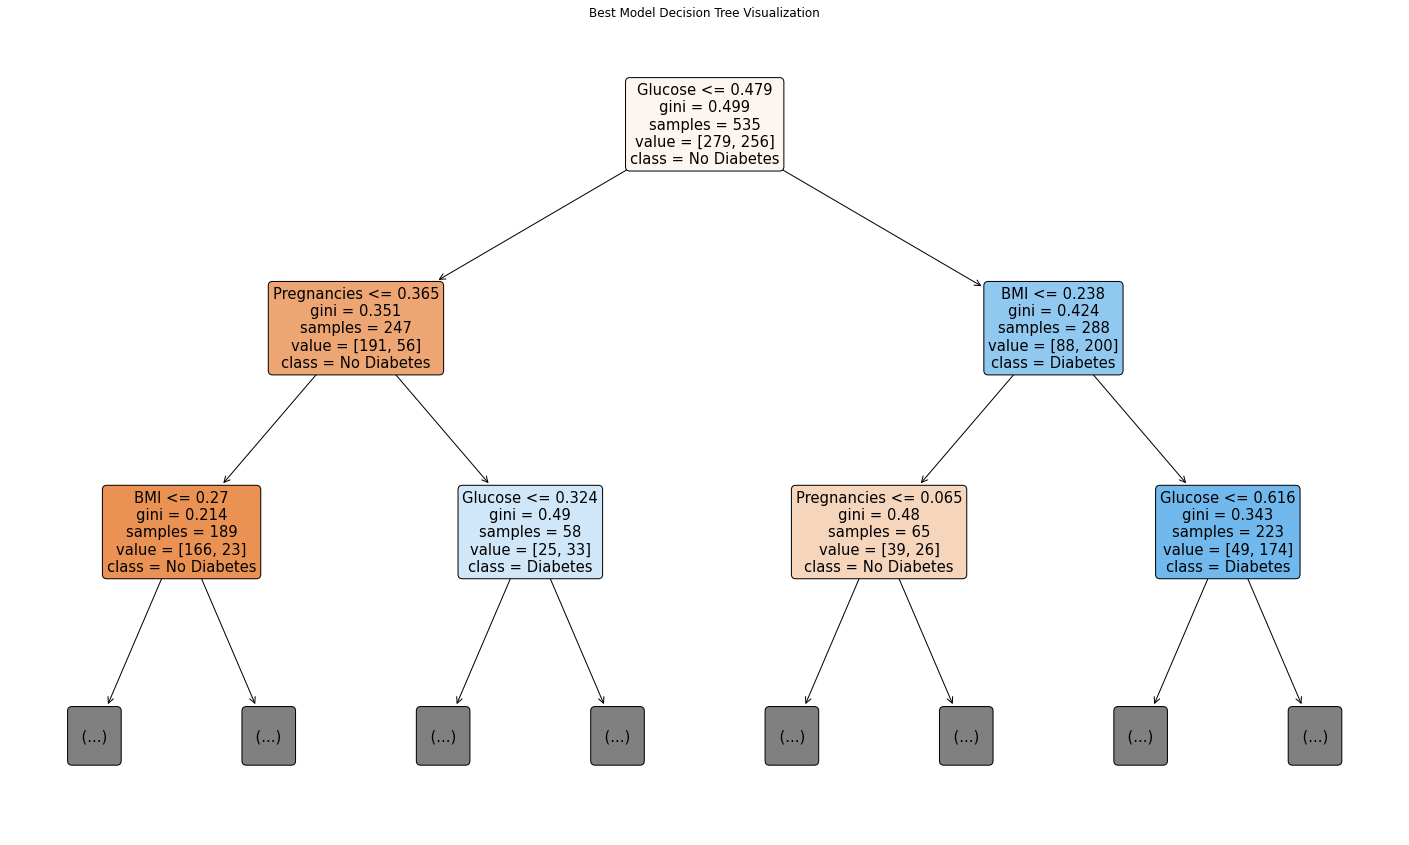


Initial Accuracy Scores with Best Parameters:
Training: 0.9177570093457944
Validation: 0.7318435754189944
Testing: 0.7394957983193278


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./balanced_diabetes.csv')

X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.25, random_state=47)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=47)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_model = DecisionTreeClassifier(random_state=0)

grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


best_model = grid_search.best_estimator_


plt.figure(figsize=(25,15))
plot_tree(best_model, 
          feature_names=X.columns, 
          class_names=['No Diabetes', 'Diabetes'],
          filled=True,  
          rounded=True,
          max_depth=2)
plt.title('Best Model Decision Tree Visualization')
plt.show()
plt.close()

print('\nInitial Accuracy Scores with Best Parameters:')
print('Training:', accuracy_score(y_train, best_model.predict(X_train)))
print('Validation:', accuracy_score(y_val, best_model.predict(X_val)))
print('Testing:', accuracy_score(y_test, best_model.predict(X_test)))


# Pruning

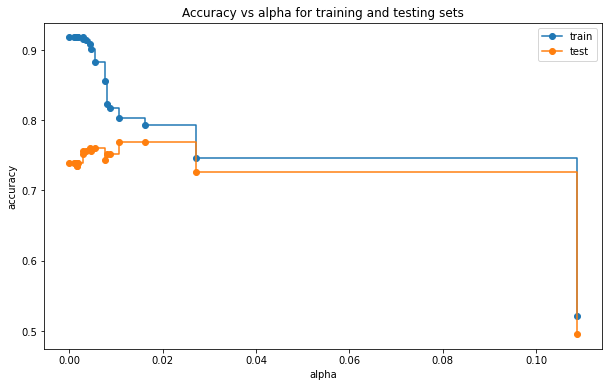


Optimal alpha value: 0.010653
Best test accuracy: 0.7689


In [18]:

# Get the cost complexity pruning path
clf = DecisionTreeClassifier(random_state=0, **grid_search.best_params_)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Take fewer samples of alpha values
n = 20 
alpha_samples = np.linspace(0, len(ccp_alphas)-1, n, dtype=int)
selected_alphas = ccp_alphas[alpha_samples]

train_scores = np.zeros(len(selected_alphas))
test_scores = np.zeros(len(selected_alphas))

for i, alpha in enumerate(selected_alphas):
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha, **grid_search.best_params_)
    clf.fit(X_train, y_train)
    train_scores[i] = clf.score(X_train, y_train)
    test_scores[i] = clf.score(X_test, y_test)


plt.figure(figsize=(10, 6))
plt.plot(selected_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
plt.plot(selected_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.title("Accuracy vs alpha for training and testing sets")
plt.legend()
plt.show()
plt.close()

optimal_idx = np.argmax(test_scores)
optimal_alpha = selected_alphas[optimal_idx]
print(f"\nOptimal alpha value: {optimal_alpha:.6f}")
print(f"Best test accuracy: {test_scores[optimal_idx]:.4f}")

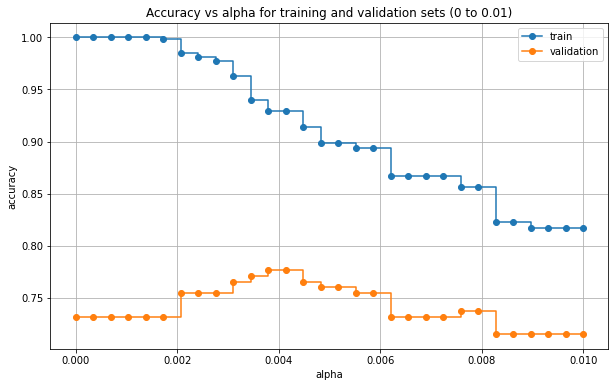


Optimal alpha analysis:
Recommended alpha value: 0.004483
Training accuracy: 0.9140
Validation accuracy: 0.7654
Gap: 0.1487


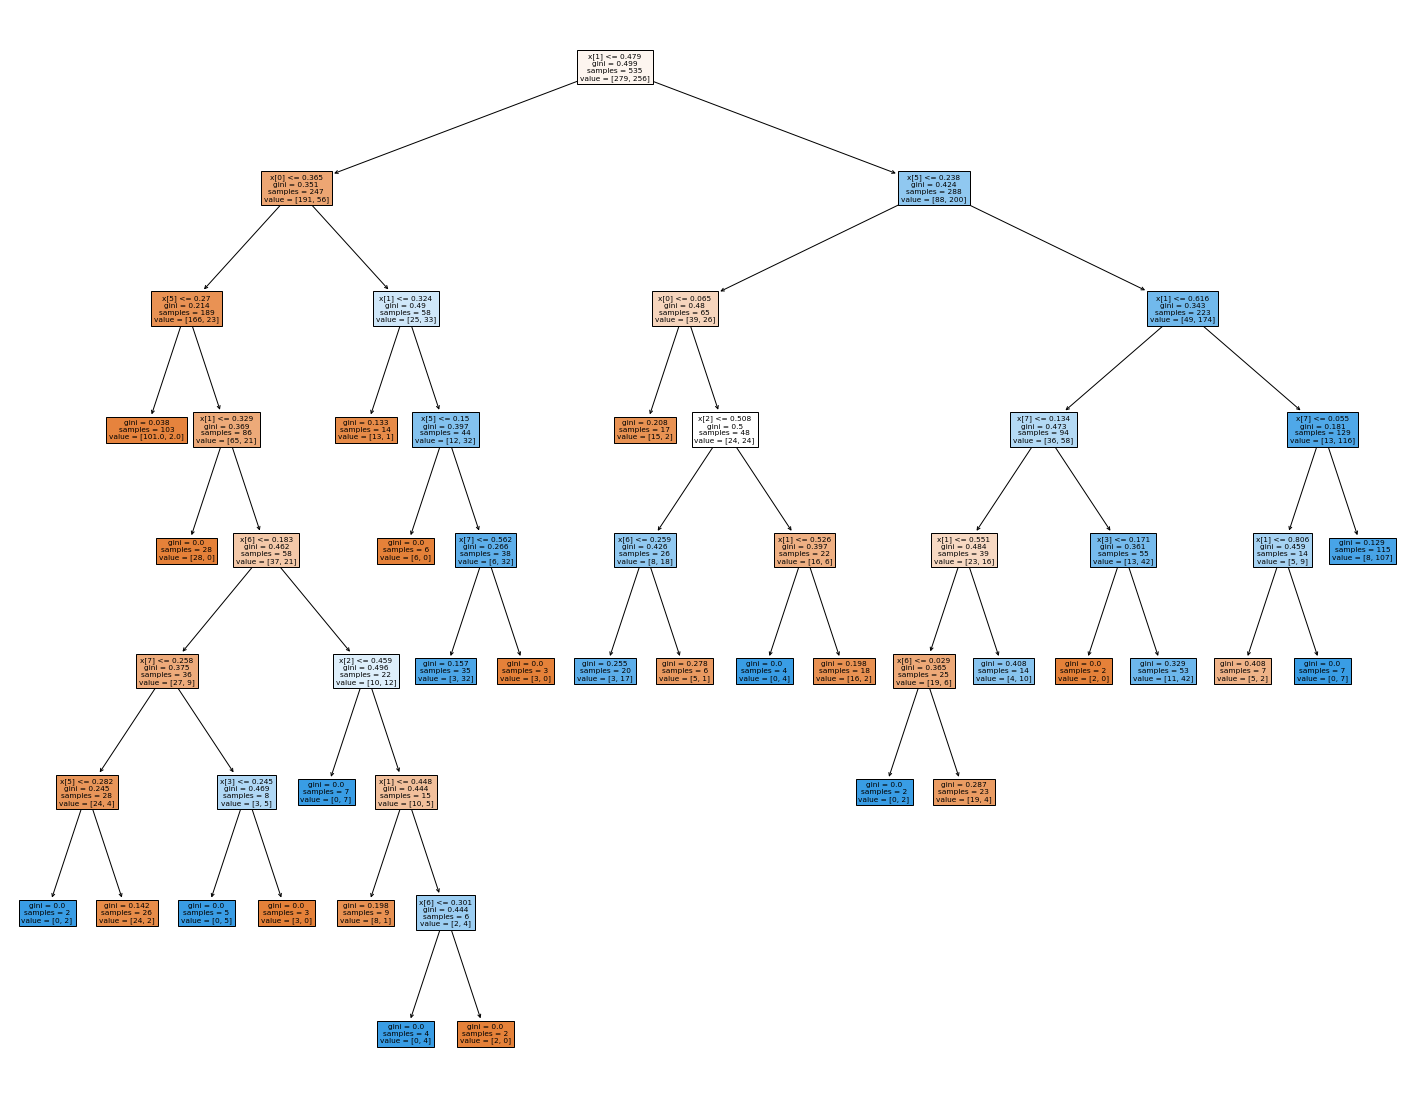


Model Performance:
Training accuracy: 0.914018691588785
Validation accuracy: 0.7653631284916201
Test accuracy: 0.7773109243697479


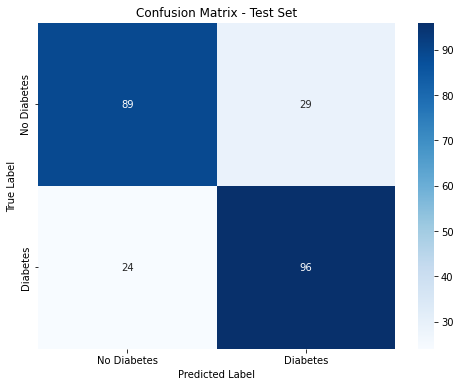

In [19]:
# Create granular alpha values
selected_alphas = np.linspace(0, 0.01, 30)
train_scores = np.zeros(len(selected_alphas))
val_scores = np.zeros(len(selected_alphas))

for i, alpha in enumerate(selected_alphas):
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    train_scores[i] = clf.score(X_train, y_train)
    val_scores[i] = clf.score(X_val, y_val)

plt.figure(figsize=(10, 6))
plt.plot(selected_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
plt.plot(selected_alphas, val_scores, marker='o', label="validation", drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.title("Accuracy vs alpha for training and validation sets (0 to 0.01)")
plt.legend()
plt.grid(True)
plt.show()
plt.close()


gaps = train_scores - val_scores
acceptable_val = val_scores >= 0.76  

if np.any(acceptable_val):
    eligible_indices = np.where(acceptable_val)[0]
    best_idx = eligible_indices[np.argmin(gaps[eligible_indices])]
    optimal_alpha = selected_alphas[best_idx]
    
    print("\nOptimal alpha analysis:")
    print(f"Recommended alpha value: {optimal_alpha:.6f}")
    print(f"Training accuracy: {train_scores[best_idx]:.4f}")
    print(f"Validation accuracy: {val_scores[best_idx]:.4f}")
    print(f"Gap: {gaps[best_idx]:.4f}")
    
   
    final_model = DecisionTreeClassifier(random_state=0, ccp_alpha=optimal_alpha)
    final_model.fit(X_train, y_train)
    
    # Visualize the final tree
    plt.figure(figsize=(25,20))
    plot_tree(final_model, filled=True)
    plt.show()
    plt.close()
    
  
    y_pred = final_model.predict(X_test)
    y_pred_proba = final_model.predict_proba(X_test)[:, 1]
    


Model Performance:
Training accuracy: 0.914018691588785
Validation accuracy: 0.7653631284916201
Test accuracy: 0.7773109243697479


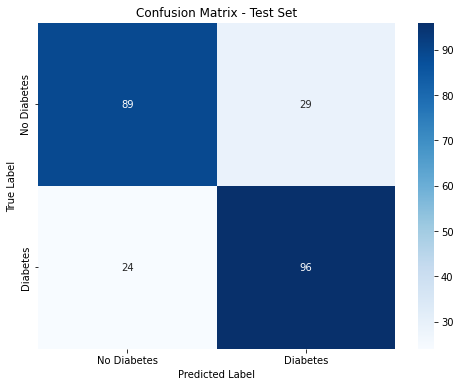

In [22]:
print("\nModel Performance:")
print("Training accuracy:", accuracy_score(y_train, final_model.predict(X_train)))
print("Validation accuracy:", accuracy_score(y_val, final_model.predict(X_val)))  
print("Test accuracy:", accuracy_score(y_test, final_model.predict(X_test)))

# Create confusion matrix for test set 
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, final_model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=['No Diabetes', 'Diabetes'],
           yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - Test Set')
plt.ylabel('True Label') 
plt.xlabel('Predicted Label')
plt.show()
plt.close()


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       118
           1       0.77      0.80      0.78       120

    accuracy                           0.78       238
   macro avg       0.78      0.78      0.78       238
weighted avg       0.78      0.78      0.78       238



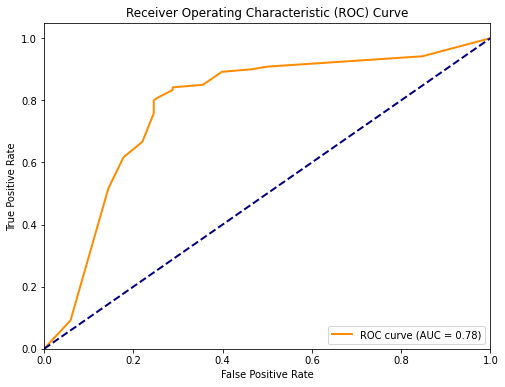

In [20]:

print("\nClassification Report on Test Set:")
print(classification_report(y_test, final_model.predict(X_test)))
    

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
    
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
plt.close()

### Result Interpretation 
The results reflect a natural progression in model development:

1. From significant overfitting in the initial phase.
2. To a better balance with the three-way split.
3. To well-generalized performance after hyperparameter tuning.

While the overall accuracy is lower, the model now balances training and test performance effectively, achieving a more reliable representation of real-world scenarios. Fine-tuning could focus on further improving recall for Class 1, depending on the application's priorities (e.g., minimizing false negatives).